In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm

## How to set the dihedral angles of a molecular system

The geometry of a peptide or protein can be changed setting new values to a given dihedral angle (or a set of them). Lets see in the following lines how this can be done with the help of the method `molsysmt.set_dihedral_angles`. First of all a demo molecular system is loaded to play with it:

In [3]:
molecular_system = msm.demo.classes.metenkephalin()

In [4]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,72,5,1,1,1,1,1,1


Lets get, before changing its value, the second $\phi$ angle in the current conformation of the system:

In [5]:
phi_chains = msm.topology.get_covalent_dihedral_quartets(molecular_system, dihedral_angle='phi')

In [6]:
msm.structure.get_dihedral_angles(molecular_system, quartets=phi_chains[2])

Magnitude,[[-179.99999499104382]]
Units,degree


In [7]:
view = msm.view(molecular_system, viewer='NGLView')
view.clear()
selection_quartet = msm.select(molecular_system, selection=phi_chains[2], to_syntaxis='NGLView')
view.add_ball_and_stick('all', color='white')
view.add_ball_and_stick(selection_quartet, color='orange')
view

NGLWidget()

Now we can rotate this angle in order to have the desired value:

In [8]:
molecular_system = msm.structure.set_dihedral_angles(molecular_system, quartets=phi_chains[2],
                                                     angles='0.0 degrees', pbc=False)

In [9]:
msm.structure.get_dihedral_angles(molecular_system, quartets=phi_chains[2])

Magnitude,[[0.0]]
Units,degree


In [10]:
view = msm.view(molecular_system, viewer='NGLView')
view.clear()
selection_quartet = msm.select(molecular_system, selection=phi_chains[2], to_syntaxis='NGLView')
view.add_ball_and_stick('all', color='white')
view.add_ball_and_stick(selection_quartet, color='orange')
view

NGLWidget()

In [11]:
view.render_image()

Image(value=b'', width='99%')

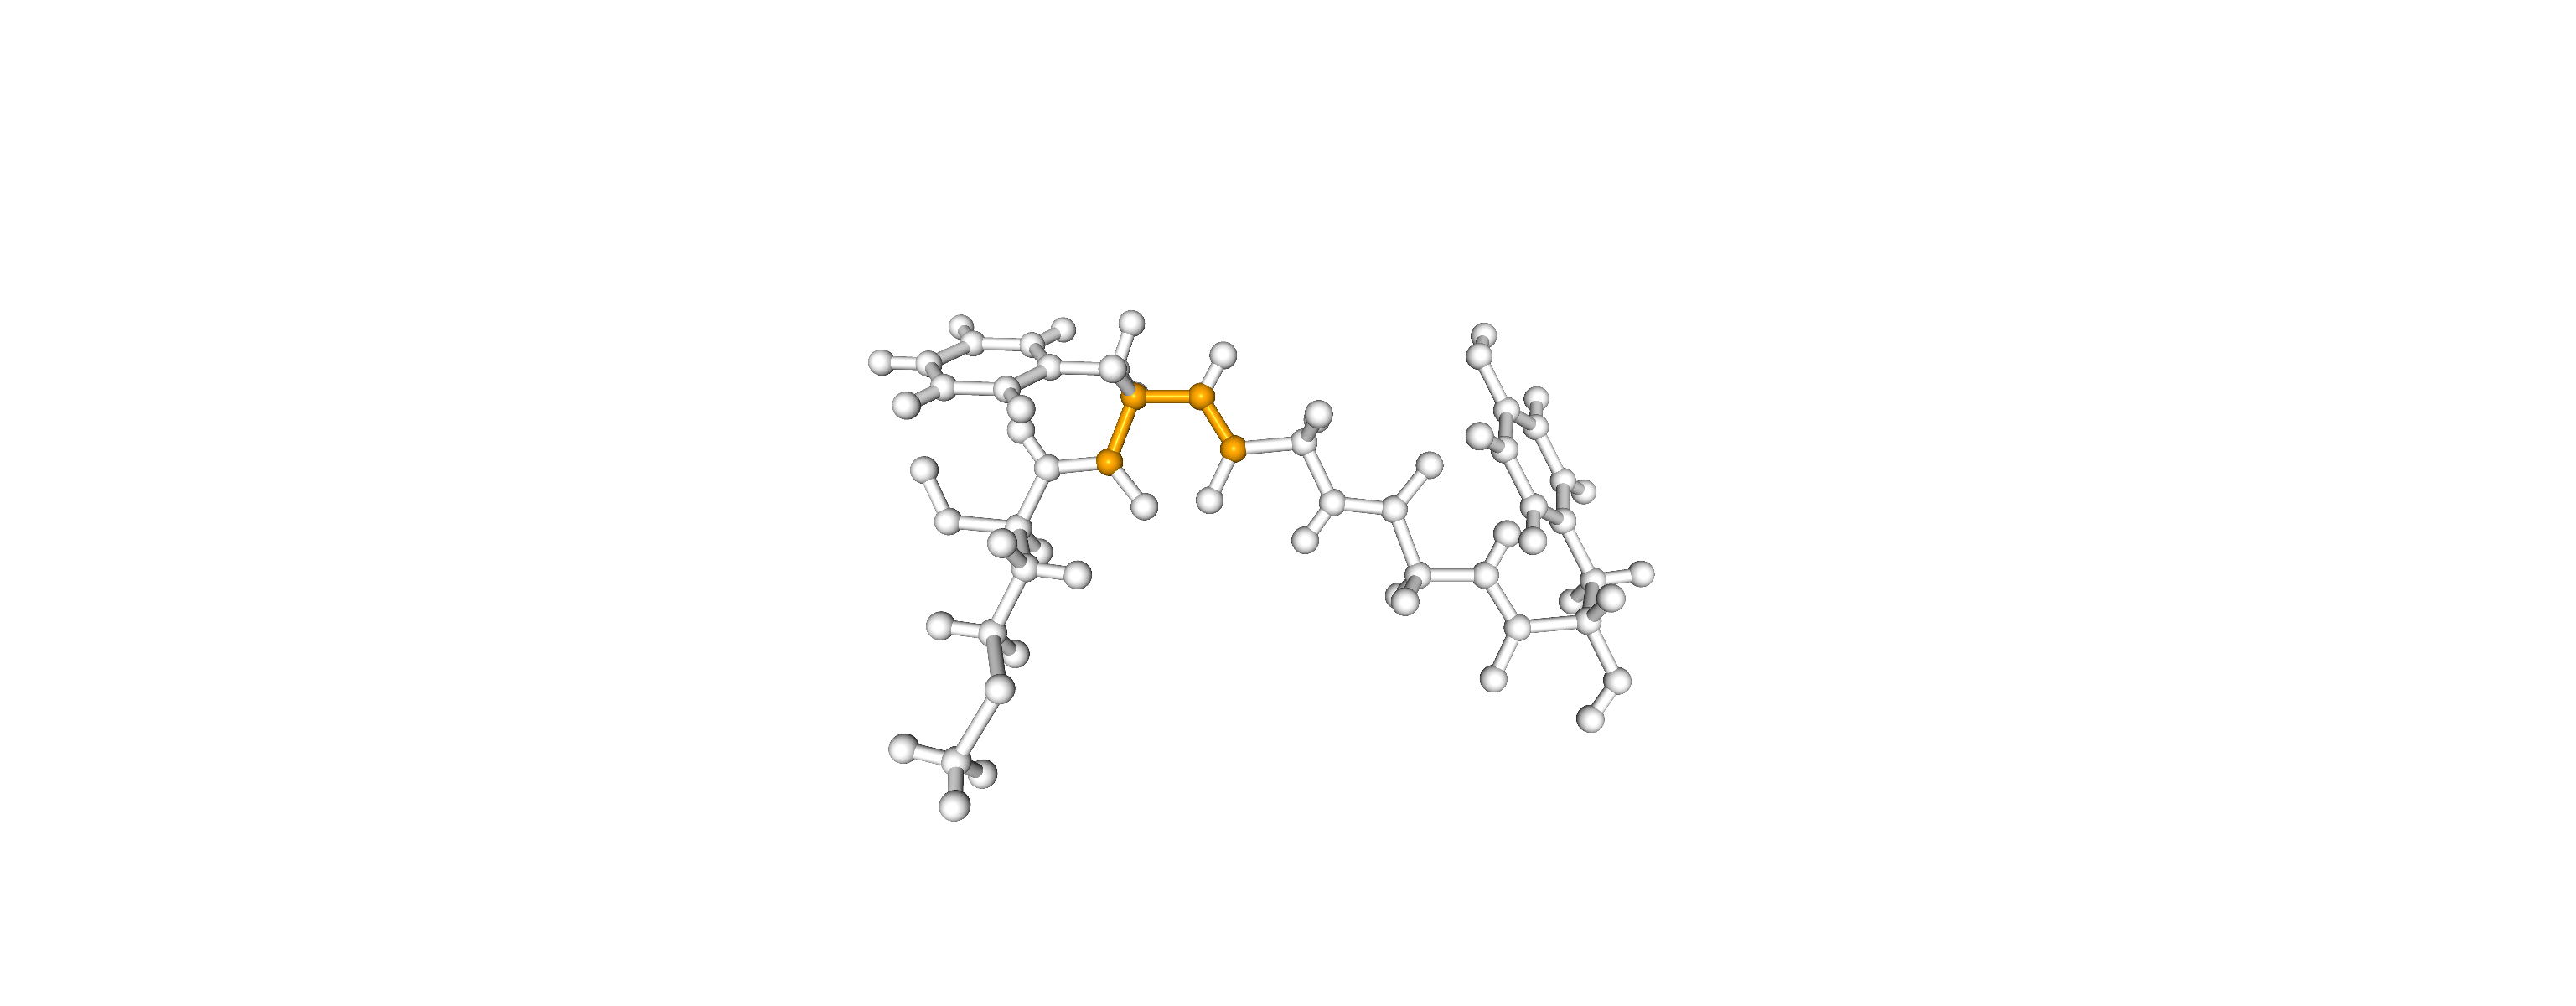

In [12]:
view._display_image()